<a href="https://colab.research.google.com/github/omniaghazy/Data-Preprocessing/blob/main/LogisticRegression(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
df = pd.read_csv("/content/titanic-Dataset.csv")

In [308]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [309]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [372]:
# This cell is for fixing outliers

# Add your code here to handle outliers

for col in df.select_dtypes(exclude="object").columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])



In [373]:
def impute_train_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [374]:
df['Age'] = df[['Age','Pclass']].apply(impute_train_age,axis=1)

/tmp/ipython-input-3981110378.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-3981110378.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [375]:
# df["Age"] = df["Age"].fillna(df["Age"].mean())


In [376]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [377]:
LISTY1=[]
for index, row in df.iterrows():
  if row['Pclass'] == 1 and pd.notna(row['Cabin']):
    LISTY1.append(row['Cabin'])
mode_cabin1 = max(set(LISTY1), key = LISTY1.count)
print(f"mode_cabin1 = {mode_cabin1}")


LISTY2=[]
for index, row in df.iterrows():
  if row['Pclass'] == 2 and pd.notna(row['Cabin']):
    LISTY2.append(row['Cabin'])
mode_cabin2 = max(set(LISTY2), key = LISTY2.count)
print(f"mode_cabin2 = {mode_cabin2}")



LISTY3=[]
for index, row in df.iterrows():
  if row['Pclass'] == 3 and pd.notna(row['Cabin']):
    LISTY3.append(row['Cabin'])
mode_cabin3 = max(set(LISTY3), key = LISTY3.count)
print(f"mode_cabin3 = {mode_cabin3}")

mode_cabin1 = 146.0
mode_cabin2 = 142.0
mode_cabin3 = 146.0


In [378]:
mode_cabin1 = "B96"
mode_cabin2 = "F2"
mode_cabin3 = "G6"

In [379]:
df['Cabin'].dtype

dtype('float64')

In [380]:
for index, row in df.iterrows():
  if pd.isna(row['Cabin']):
    if row['Pclass'] == 3:
      df.loc[index, 'Cabin'] = mode_cabin3
    elif row['Pclass'] == 2:
      df.loc[index, 'Cabin'] = mode_cabin2
    elif row['Pclass'] == 1:
      df.loc[index, 'Cabin'] = mode_cabin1

In [381]:
df['Cabin'].isna().sum()

np.int64(0)

In [382]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,146.0,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,14.4542,146.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,146.0,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,146.0,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,146.0,2.0


In [383]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,27.925556,0.297419,0.0,17.383622,144.849607,1.536476
std,0.486592,0.836071,0.477990,11.650422,0.521648,0.0,12.713016,2.777892,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.0,0.000000,123.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.0,7.910400,146.000000,1.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.0,14.454200,146.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.0,24.150000,146.000000,2.000000
max,1.000000,3.000000,1.000000,59.000000,2.000000,0.0,65.000000,147.000000,2.000000


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    float64
 8   Embarked  891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


In [385]:
for col in df.select_dtypes(exclude="object").columns:
  display(df[col].describe())
  print(f"nunique = {df[col].nunique()}")
  print(f"{df[col].isna().sum()}")
  print("==" *23)

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


nunique = 2
0


,Pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


nunique = 3
0


,Sex
count,891.000000
mean,0.647587
std,0.477990
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


nunique = 2
0


,Age
count,891.000000
mean,27.925556
std,11.650422
min,0.420000
25%,22.000000
50%,26.000000
75%,35.000000
max,59.000000


nunique = 76
0


,SibSp
count,891.000000
mean,0.297419
std,0.521648
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


nunique = 3
0


,Parch
count,891.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


nunique = 1
0


,Fare
count,891.000000
mean,17.383622
std,12.713016
min,0.000000
25%,7.910400
50%,14.454200
75%,24.150000
max,65.000000


nunique = 203
0


,Cabin
count,891.000000
mean,144.849607
std,2.777892
min,123.000000
25%,146.000000
50%,146.000000
75%,146.000000
max,147.000000


nunique = 25
0


,Embarked
count,891.000000
mean,1.536476
std,0.791503
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


nunique = 3
0


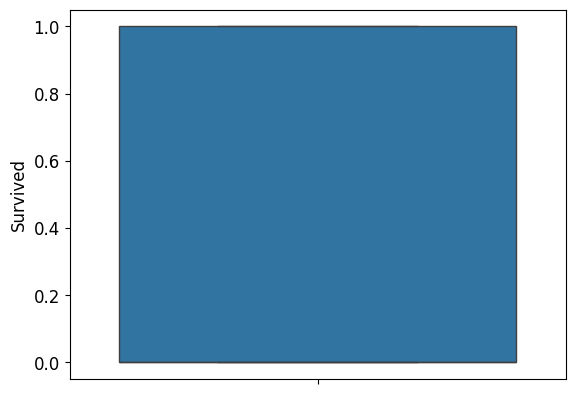

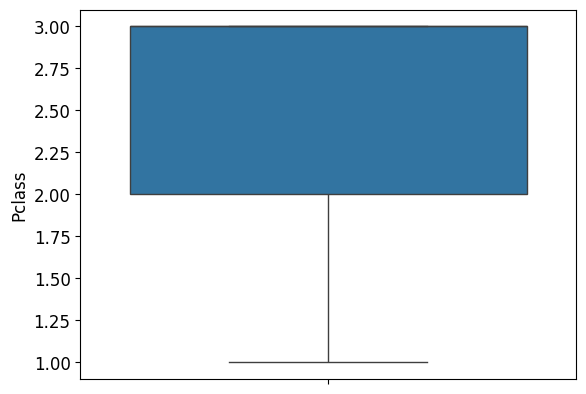

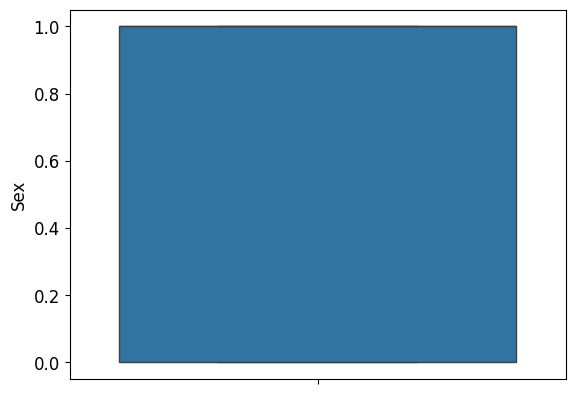

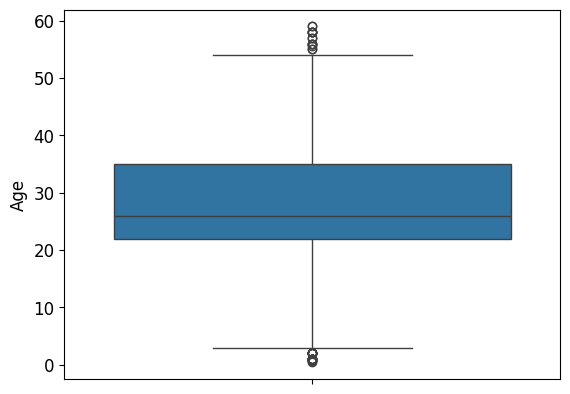

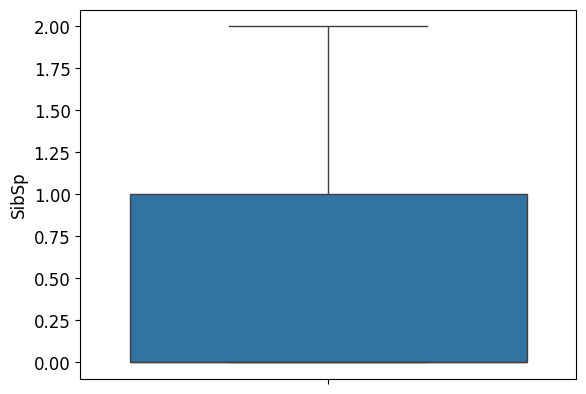

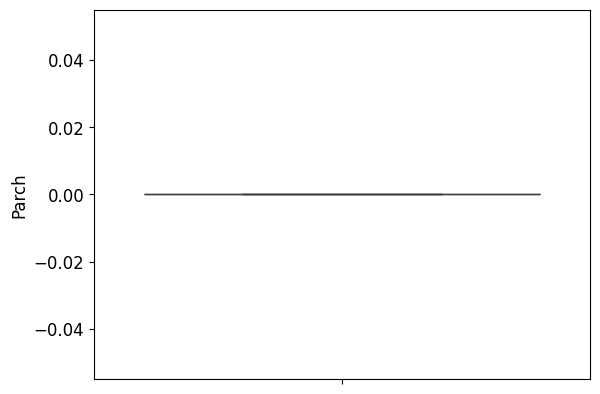

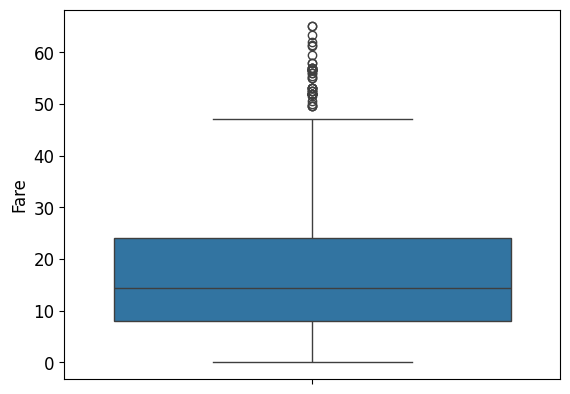

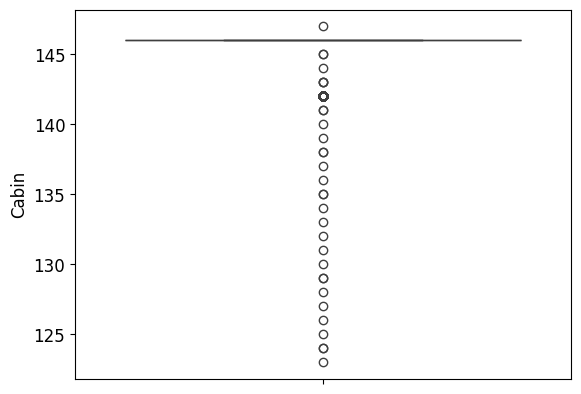

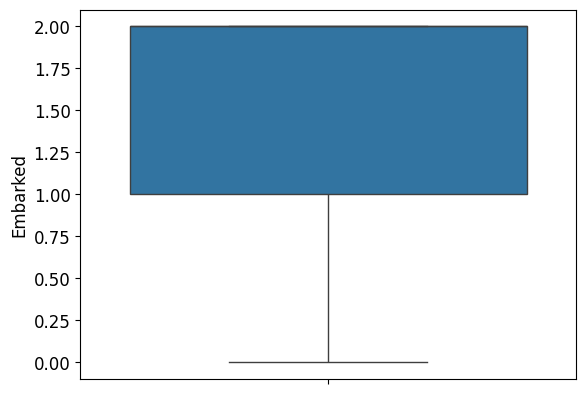

In [386]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()

In [387]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,146.0,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,14.4542,146.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,146.0,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,146.0,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,146.0,2.0


In [388]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [389]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [390]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [391]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,146.0,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,14.4542,146.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,146.0,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,146.0,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,146.0,2.0


In [392]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [393]:
df.select_dtypes("object").columns

Index([], dtype='object')

In [394]:
for col in df.select_dtypes("object").columns:
  df[col] = LabelEncoder.fit_transform(df[col])

In [395]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,146.0,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,14.4542,146.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,146.0,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,146.0,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,146.0,2.0


In [396]:
df.drop(columns=["Name", "Ticket","PassengerId"], inplace=True)

KeyError: "['Name', 'Ticket', 'PassengerId'] not found in axis"

In [397]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,146.0,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,14.4542,146.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,146.0,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,146.0,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,146.0,2.0


In [398]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.029506,0.160608,NaN,0.190926,-0.095232,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.375647,-0.128272,NaN,-0.433904,0.284154,0.162098
Sex,-0.543351,0.131900,1.000000,0.045927,-0.173988,NaN,-0.102979,0.078508,0.108262
Age,-0.029506,-0.375647,0.045927,1.000000,-0.025486,NaN,0.082824,-0.133442,-0.012012
SibSp,0.160608,-0.128272,-0.173988,-0.025486,1.000000,NaN,0.241798,-0.092384,-0.065764
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,0.190926,-0.433904,-0.102979,0.082824,0.241798,NaN,1.000000,-0.246941,-0.023439
Cabin,-0.095232,0.284154,0.078508,-0.133442,-0.092384,NaN,-0.246941,1.000000,-0.079266
Embarked,-0.167675,0.162098,0.108262,-0.012012,-0.065764,NaN,-0.023439,-0.079266,1.000000


In [399]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,146.0,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,14.4542,146.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,146.0,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,146.0,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,146.0,2.0


In [400]:
df.groupby("Survived").mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,,,,,,,,
0.0,2.531876,0.852459,28.196721,0.231330,0.0,15.468944,145.058288,1.641166
1.0,1.950292,0.318713,27.490263,0.403509,0.0,20.457185,144.514620,1.368421


In [401]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [402]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,146.0,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,14.4542,146.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,146.0,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,146.0,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,146.0,2.0
5,0.0,3.0,1.0,24.0,0.0,0.0,8.4583,146.0,1.0
6,0.0,1.0,1.0,54.0,0.0,0.0,51.8625,130.0,2.0
7,0.0,3.0,1.0,2.0,0.0,0.0,21.0750,146.0,2.0
8,1.0,3.0,0.0,27.0,0.0,0.0,11.1333,146.0,2.0
9,1.0,2.0,0.0,14.0,1.0,0.0,30.0708,142.0,0.0


In [403]:
from sklearn.model_selection import train_test_split

x = df[["Age", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked", "Cabin"]]
y = df[["Survived"]]



In [404]:
df['Parch'].value_counts(normalize= True)


,proportion
Parch,
0.0,1.0


In [405]:
x.drop(columns=["Parch"],inplace= True)

/tmp/ipython-input-1869073207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=["Parch"],inplace= True)


In [406]:
x['SibSp'].value_counts(normalize= True)

,proportion
SibSp,
0.0,0.734007
1.0,0.234568
2.0,0.031425


In [407]:
x.head()

,Age,Pclass,Sex,SibSp,Fare,Embarked,Cabin
0,22.0,3.0,1.0,1.0,7.2500,2.0,146.0
1,38.0,1.0,0.0,1.0,14.4542,0.0,146.0
2,26.0,3.0,0.0,0.0,7.9250,2.0,146.0
3,35.0,1.0,0.0,1.0,53.1000,2.0,146.0
4,35.0,3.0,1.0,0.0,8.0500,2.0,146.0


In [408]:
y.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [409]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=142)

In [410]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [411]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression(max_iter=4000)


In [412]:
LogisticRegression.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=4000)

[[103  13]
 [ 20  43]]


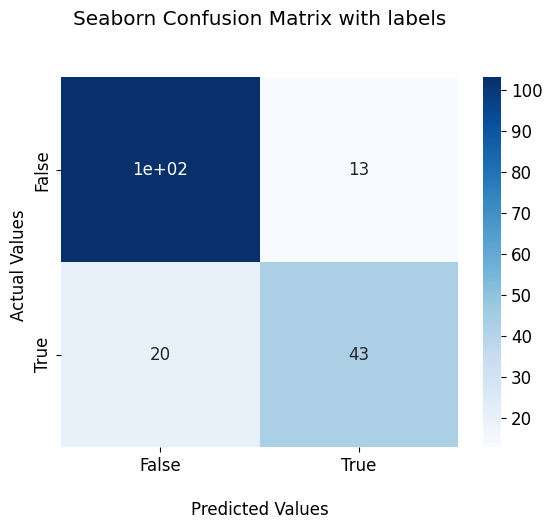

In [413]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix

y_pred=LogisticRegression.predict(x_test)
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [414]:
from sklearn.metrics import classification_report
from sklearn import metrics
y_pred=LogisticRegression.predict(x_test)
print(classification_report(y_test,y_pred))

accracy=metrics.accuracy_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
precision=metrics.precision_score(y_test,y_pred)
recall=metrics.recall_score(y_test,y_pred)

print (f'logictic regression model Accuracy - : {100*accracy:.3} %')
print (f'logictic regression model f1_score - : {100*f1_score:.3} %')
print (f'logictic regression model precision - : {100*precision:.3} %')
print (f'logictic regression model recall - : {100*recall:.3}  %')

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       116
         1.0       0.77      0.68      0.72        63

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179

logictic regression model Accuracy - : 81.6 %
logictic regression model f1_score - : 72.3 %
logictic regression model precision - : 76.8 %
logictic regression model recall - : 68.3  %


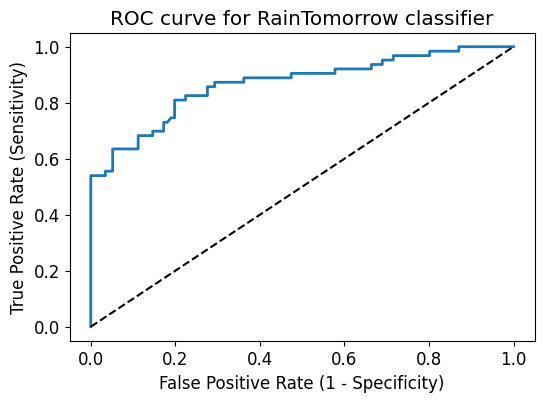

In [415]:
# plot ROC Curve

y_pred1=LogisticRegression.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve

fpr , tpr , thresholds = roc_curve(y_test,y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr,tpr,linewidth=2)

plt.plot([0,1],[0,1],"k--")

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [416]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred1)
print(f'AUC: {auc:.3f}')

AUC: 0.868


In [417]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,146.0,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,14.4542,146.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,146.0,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,146.0,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,146.0,2.0


In [418]:
df['SibSp'].value_counts(normalize= True)

,proportion
SibSp,
0.0,0.734007
1.0,0.234568
2.0,0.031425
